In [1]:
import sys  # Always needed
print("Python version:", sys.version)
import pandas as pd
print("pandas version:", pd.__version__)
import matplotlib.pyplot as plt
import numpy as np
print("NumPy version:", np.__version__)
import scipy as sp
print("SciPy version:", sp.__version__)
import IPython
print("IPython version:", IPython.__version__)
import sklearn
print("scikit-learn version:", sklearn.__version__)
import seaborn as sns 
import mglearn
import os

Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.1.3
NumPy version: 1.19.2
SciPy version: 1.5.2
IPython version: 7.19.0
scikit-learn version: 0.23.2


In [2]:
# Further imports

In [3]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
dataset = pd.read_csv("Files\season-1718_csv.csv", parse_dates=["Date"], usecols=['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR'])
dataset_2 = pd.read_csv("Files\season-1819_csv.csv", parse_dates=["Date"], usecols=['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR'])
dataset_3 = pd.read_csv("Files\season-1920_csv.csv", parse_dates=["Date"], usecols=['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR'])

dataset = dataset.append(dataset_2, ignore_index=True, verify_integrity=False, sort=False)
dataset = dataset.append(dataset_3, ignore_index=True, verify_integrity=False, sort=False)            
print(type(dataset))

 
validation_set = pd.read_csv("Files\season-2021_csv.csv", parse_dates=["Date"], 
                               usecols=['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
                                        'FTR'])                                       

#dataset.iloc[:5]

team_names = {'Man City': 1, 'Man United': 2, 'Liverpool': 3, 'Chelsea': 4, 
              'Leicester': 5, 'West Ham': 6, 'Tottenham': 7, 'Arsenal': 8, 
              'Leeds': 9, 'Everton': 10, 'Aston Villa': 11, 'Newcastle': 12, 
              'Wolves': 13, 'Crystal Palace': 14, 'Southampton': 15, 
              'Brighton': 16, 'Burnley': 17, 'Fulham': 18, 
              'West Brom': 19, 'Sheffield United': 20, 'Huddersfield': 21,
              'Watford': 22, 'Stoke' : 23, 'Swansea': 24, 'Bournemouth': 25, 
              'Cardiff': 26, 'Norwich' : 27}

feature_names = ['HomeLastResult', 'AwayLastResult']
target_names = {'H': 2, 'D': 1, 'A': 0}



<class 'pandas.core.frame.DataFrame'>


In [4]:
column1 = [training_set_y]
column2 = [validation_set_y]

training_total = training_set_X.copy()
training_total.insert(7, 'FTR', *column1)

validation_total = validation_set_X.copy()
validation_total.insert(7, 'FTR', *column2)

complete_set = training_total.append(validation_total, ignore_index=True, verify_integrity=False, sort=False)

NameError: name 'training_set_y' is not defined

In [ ]:
# Creating two new features determining whether each team won their last match.
from collections import defaultdict
# Dicts for training set and validation set
no_last_result = 70

last_result_t = defaultdict(lambda: no_last_result)
last_result_v = defaultdict(lambda: no_last_result)



dataset["HomeLastResult"] = no_last_result
dataset["AwayLastResult"] = no_last_result

validation_set["HomeLastResult"] = no_last_result
validation_set["AwayLastResult"] = no_last_result


# Converting strings into integers to be used by algorithms.
# Training data
for index, row in dataset.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    row['FTR'] = target_names[row['FTR']]
    row['HomeTeam'] = team_names[home_team]
    row['AwayTeam'] = team_names[away_team] 
    dataset.iloc[index] = row
    
# Test data    
for index, row in validation_set.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    row['FTR'] = target_names[row['FTR']]
    row['HomeTeam'] = team_names[home_team]
    row['AwayTeam'] = team_names[away_team] 
    validation_set.iloc[index] = row
validation_set

## New Feature: LastResult?

In [ ]:
# 2: win, 1: draw, 0: loss

for index, row in dataset.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']  
    row['HomeLastResult'] = last_result_t[home_team]
    row['AwayLastResult'] = last_result_t[away_team]  
    dataset.iloc[index] = row
    if row['FTR'] == 2:
        last_result_t[home_team] = 2
        last_result_t[away_team] = 0
    elif row['FTR'] == 0:
        last_result_t[home_team] = 0
        last_result_t[away_team] = 2
    elif row['FTR'] == 1:
        last_result_t[home_team] = 1
        last_result_t[away_team] = 1
    else:
        last_result_t[home_team] = no_last_result
        last_result_t[away_team] = no_last_result
        

                
        
 # needs to be not but we have 3 classes not true/false
  
    #myrow = validation_set.loc[[index]]
    #display(myrow)

In [ ]:
for index, row in validation_set.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']  
    row['HomeLastResult'] = last_result_v[home_team]
    row['AwayLastResult'] = last_result_v[away_team]  
    validation_set.iloc[index] = row
    if row['FTR'] == 2:      
        last_result_v[home_team] = 2
        last_result_v[away_team] = 0
    elif row['FTR'] == 0:
        last_result_v[home_team] = 0
        last_result_v[away_team] = 2
    elif row['FTR'] == 1:
        last_result_v[home_team] = 1
        last_result_v[away_team] = 1
    else:
        last_result_v[home_team] = no_last_result
        last_result_v[away_team] = no_last_result
        

In [5]:
training_set_X = dataset[feature_names]
training_set_y = dataset['FTR']

validation_set_X = validation_set[feature_names]
validation_set_y = validation_set['FTR']


validation_set_y

KeyError: "None of [Index(['HomeLastResult', 'AwayLastResult'], dtype='object')] are in the [columns]"

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(dataset[feature_names].values, dataset['FTR'].values, shuffle=False, random_state = 5)
print("X_train shape:", training_set_X.shape)
print("y_train shape:", training_set_y.shape)

X_train shape: (1140, 2)
y_train shape: (1140,)


In [9]:
training_set_X = training_set_X.astype('int')
training_set_y = training_set_y.astype('int')
validation_set_X = validation_set_X.astype('int')
validation_set_y = validation_set_y.astype('int')

In [10]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(training_set_X, training_set_y)
    y_pred = knn.predict(validation_set_X)
    # Using the team names and both team's last result as features.
    print(i, ", Test set score:  {:.3f}".format(np.mean(y_pred == validation_set_y)))

1 , Test set score:  0.366
2 , Test set score:  0.397
3 , Test set score:  0.392
4 , Test set score:  0.382
5 , Test set score:  0.389
6 , Test set score:  0.382
7 , Test set score:  0.379
8 , Test set score:  0.389
9 , Test set score:  0.405
10 , Test set score:  0.403
11 , Test set score:  0.405
12 , Test set score:  0.389
13 , Test set score:  0.397
14 , Test set score:  0.358
15 , Test set score:  0.387
16 , Test set score:  0.382
17 , Test set score:  0.376
18 , Test set score:  0.392
19 , Test set score:  0.389
20 , Test set score:  0.368
21 , Test set score:  0.392
22 , Test set score:  0.389
23 , Test set score:  0.389
24 , Test set score:  0.389
25 , Test set score:  0.376
26 , Test set score:  0.376
27 , Test set score:  0.376
28 , Test set score:  0.387
29 , Test set score:  0.371
30 , Test set score:  0.392
31 , Test set score:  0.382
32 , Test set score:  0.392
33 , Test set score:  0.382
34 , Test set score:  0.382
35 , Test set score:  0.382
36 , Test set score:  0.382
3

# New Feature: Wins so far?

In [11]:
dataset["HomeWinsSoFar"], dataset["AwayWinsSoFar"] = 0, 0
validation_set["HomeWinsSoFar"], validation_set["AwayWinsSoFar"] = 0, 0
wins_so_far = defaultdict(int)
feature_names.extend(("HomeWinsSoFar", "AwayWinsSoFar"))

In [12]:
feature_names = ['HomeWinsSoFar', 'AwayWinsSoFar']

In [13]:
# Calculating wins so far
# First for training data
for index, row in dataset.iterrows():
    home_team = row["HomeTeam"]
    away_team = row["AwayTeam"]
    row["HomeWinsSoFar"] = wins_so_far[home_team]
    row["AwayWinsSoFar"] = wins_so_far[away_team]
    
    dataset.iloc[index] = row
    if row['FTR'] == 2:
        wins_so_far[home_team] += 1
    elif row['FTR'] == 0:
        wins_so_far[away_team] += 1
    else:
        wins_so_far[home_team] += 0.75
        wins_so_far[away_team] += 0.75
        
# Then for validation data      
wins_so_far = defaultdict(int)        
for index, row in validation_set.iterrows():
    home_team = row["HomeTeam"]
    away_team = row["AwayTeam"]
    row["HomeWinsSoFar"] = wins_so_far[home_team]
    row["AwayWinsSoFar"] = wins_so_far[away_team]
    
    validation_set.iloc[index] = row
    if row['FTR'] == 2:
        wins_so_far[home_team] += 1
    elif row['FTR'] == 0:
        wins_so_far[away_team] += 1
    else:
        wins_so_far[home_team] += 0.75
        wins_so_far[away_team] += 0.75

    myrow = validation_set.loc[[index]]
    display(myrow)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
0,2020-12-09,18,8,0,3,0,70,70,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
1,2020-12-09,14,15,1,0,2,70,70,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
2,2020-12-09,3,9,4,3,2,70,70,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
3,2020-12-09,6,12,0,2,0,70,70,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
4,2020-09-13,19,5,0,3,0,70,70,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
5,2020-09-13,7,10,0,1,0,70,70,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
6,2020-09-14,16,4,1,3,0,70,70,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
7,2020-09-14,20,13,0,2,0,70,70,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
8,2020-09-19,10,19,5,2,2,2,0,1,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
9,2020-09-19,9,18,4,3,2,0,0,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
10,2020-09-19,2,14,1,3,0,70,2,0,1


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
11,2020-09-19,8,6,2,1,2,2,0,1,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
12,2020-09-20,15,7,2,5,0,0,0,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
13,2020-09-20,12,16,0,3,0,2,0,1,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
14,2020-09-20,4,3,0,2,0,2,2,1,1


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
15,2020-09-20,5,17,4,2,2,2,70,1,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
16,2020-09-21,11,20,1,0,2,70,0,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
17,2020-09-21,13,1,1,3,0,2,70,1,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
18,2020-09-26,16,2,2,3,0,2,0,1,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
19,2020-09-26,14,10,1,2,0,2,2,2,2


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
20,2020-09-26,19,4,3,3,1,0,0,0,1


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
21,2020-09-26,17,15,0,1,0,0,0,0,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
22,2020-09-27,20,9,0,1,0,0,2,0,1


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
23,2020-09-27,7,12,1,1,1,2,0,1,1


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
24,2020-09-27,1,5,2,5,0,2,2,1,2


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
25,2020-09-27,6,13,4,0,2,0,0,0,1


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
26,2020-09-28,18,11,0,3,0,0,2,0,1


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
27,2020-09-28,3,8,3,1,2,2,2,2,2


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
28,2020-03-10,4,14,4,0,2,1,0,1.75,2


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
29,2020-03-10,10,16,4,2,2,2,0,3.0,1


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
30,2020-03-10,9,1,1,1,1,2,0,2.0,1


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
31,2020-03-10,12,17,3,1,2,1,0,1.75,0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
32,2020-04-10,5,6,0,3,0,2,2,3.0,1


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
33,2020-04-10,15,19,2,0,2,2,1,1.0,0.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
34,2020-04-10,8,20,2,1,2,0,0,2.0,0.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
35,2020-04-10,13,18,1,0,2,0,0,1.0,0.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
36,2020-04-10,2,7,1,6,0,2,1,1.0,1.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
37,2020-04-10,11,3,7,2,2,2,2,2.0,3.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
38,2020-10-17,10,3,2,2,1,2,0,4.0,3.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
39,2020-10-17,4,15,3,3,1,2,2,2.75,2.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
40,2020-10-17,1,8,1,0,2,1,2,1.75,3.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
41,2020-10-17,12,2,1,4,0,2,0,2.75,1.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
42,2020-10-18,20,18,1,1,1,0,0,0.0,0.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
43,2020-10-18,14,16,1,1,1,0,0,2.0,1.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
44,2020-10-18,7,6,3,3,1,2,2,2.75,2.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
45,2020-10-18,5,11,0,1,0,0,2,3.0,3.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
46,2020-10-19,19,17,0,0,1,0,0,0.75,0.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
47,2020-10-19,9,13,0,1,0,1,2,2.75,2.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
48,2020-10-23,11,9,0,3,0,2,0,4.0,2.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
49,2020-10-24,6,1,1,1,1,1,2,2.75,2.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
50,2020-10-24,18,14,1,2,0,1,1,0.75,2.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
51,2020-10-24,2,4,0,0,1,2,1,2.0,3.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
52,2020-10-24,3,20,2,1,2,1,1,3.75,0.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
53,2020-10-25,15,10,2,0,2,1,1,2.75,4.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
54,2020-10-25,13,12,1,1,1,2,0,3.0,2.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
55,2020-10-25,8,5,0,1,0,0,0,3.0,3.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
56,2020-10-26,16,19,1,1,1,1,1,1.75,1.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
57,2020-10-26,17,7,0,1,0,1,1,0.75,3.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
58,2020-10-30,13,14,2,0,2,1,2,3.75,3.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
59,2020-10-31,20,1,0,1,0,0,1,0.75,3.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
60,2020-10-31,17,4,0,3,0,0,1,0.75,4.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
61,2020-10-31,3,6,2,1,2,2,1,4.75,3.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
62,2020-01-11,11,15,3,4,0,0,2,4.0,3.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
63,2020-01-11,12,10,2,1,2,1,0,3.5,4.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
64,2020-01-11,2,8,0,1,0,1,0,2.75,3.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
65,2020-01-11,7,16,2,1,2,2,1,4.5,2.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
66,2020-02-11,18,19,2,0,2,0,1,0.75,2.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
67,2020-02-11,9,5,1,4,0,2,2,3.75,4.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
68,2020-06-11,16,17,0,0,1,0,0,2.5,0.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
69,2020-06-11,15,12,2,0,2,2,2,4.75,4.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
70,2020-07-11,10,2,1,3,0,0,0,4.75,2.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
71,2020-07-11,14,9,4,1,2,0,0,3.75,3.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
72,2020-07-11,4,20,4,1,2,2,0,5.25,0.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
73,2020-07-11,6,18,1,0,2,0,2,3.5,1.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
74,2020-08-11,19,7,0,1,0,0,2,2.25,5.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
75,2020-08-11,5,13,1,0,2,2,2,5.0,4.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
76,2020-08-11,1,3,1,1,1,2,2,4.5,5.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
77,2020-08-11,8,11,0,3,0,2,0,4.0,4.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
78,2020-11-21,12,4,0,2,0,0,2,4.5,6.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
79,2020-11-21,11,16,1,2,0,2,1,5.0,3.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
80,2020-11-21,7,1,2,0,2,2,1,6.5,5.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
81,2020-11-21,2,19,1,0,2,2,0,3.75,2.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
82,2020-11-22,18,10,2,3,0,0,0,1.75,4.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
83,2020-11-22,20,6,0,1,0,0,2,0.75,4.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
84,2020-11-22,9,8,0,0,1,0,0,3.75,4.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
85,2020-11-22,3,5,3,0,2,1,2,6.5,6.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
86,2020-11-23,17,14,1,0,2,1,2,1.5,4.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
87,2020-11-23,13,15,1,1,1,0,2,4.75,5.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
88,2020-11-27,14,12,0,2,0,0,0,4.75,4.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
89,2020-11-28,16,3,1,1,1,2,2,4.25,7.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
90,2020-11-28,1,17,5,0,2,0,2,5.25,2.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
91,2020-11-28,10,9,0,1,0,2,1,5.75,4.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
92,2020-11-28,19,20,1,0,2,0,0,2.25,0.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
93,2020-11-29,15,2,2,3,0,1,2,6.5,4.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
94,2020-11-29,4,7,0,0,1,2,2,7.25,7.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
95,2020-11-29,8,13,1,2,0,1,1,4.75,5.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
96,2020-11-30,5,18,1,2,0,0,0,6.0,1.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
97,2020-11-30,6,11,2,1,2,2,0,5.5,5.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
98,2020-05-12,17,10,1,1,1,0,0,2.5,5.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
99,2020-05-12,1,18,2,0,2,2,2,6.25,2.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
100,2020-05-12,6,2,1,3,0,2,2,6.5,5.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
101,2020-05-12,4,9,3,1,2,1,2,8.0,5.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
102,2020-06-12,19,14,1,5,0,2,0,3.25,4.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
103,2020-06-12,20,5,1,2,0,0,0,0.75,6.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
104,2020-06-12,7,8,2,0,2,1,0,8.25,4.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
105,2020-06-12,3,13,4,0,2,1,2,8.25,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
106,2020-07-12,16,15,1,2,0,1,0,5.0,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
107,2020-11-12,9,6,1,2,0,0,0,5.5,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
108,2020-12-12,13,11,0,1,0,0,0,6.5,5.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
109,2020-12-12,12,19,2,1,2,2,0,5.5,3.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
110,2020-12-12,2,1,0,0,1,2,2,6.75,7.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
111,2020-12-12,10,4,1,0,2,1,2,6.5,9.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
112,2020-12-13,15,20,3,0,2,2,0,7.5,0.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
113,2020-12-13,14,7,1,1,1,2,2,5.75,9.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
114,2020-12-13,18,3,1,1,1,0,2,2.75,9.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
115,2020-12-13,8,17,0,1,0,0,1,4.75,3.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
116,2020-12-13,5,16,3,0,2,2,0,7.0,5.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
117,2020-12-15,13,4,2,1,2,0,0,6.5,9.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
118,2020-12-15,1,19,1,1,1,1,0,8.0,3.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
119,2020-12-16,8,15,1,1,1,0,2,4.75,8.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
120,2020-12-16,9,12,5,2,2,0,2,5.5,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
121,2020-12-16,5,10,0,2,0,2,2,8.0,7.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
122,2020-12-16,18,16,0,0,1,1,0,3.5,5.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
123,2020-12-16,3,7,2,1,2,1,1,10.0,10.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
124,2020-12-16,6,14,1,1,1,2,1,7.5,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
125,2020-12-17,11,17,0,0,1,2,2,6.0,4.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
126,2020-12-17,20,2,2,3,0,0,1,0.75,7.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
127,2020-12-19,14,3,0,7,0,1,2,7.25,11.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
128,2020-12-19,15,1,0,1,0,1,1,9.25,8.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
129,2020-12-19,10,8,2,1,2,2,1,8.5,5.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
130,2020-12-19,12,18,1,1,1,0,1,6.5,4.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
131,2020-12-20,16,20,1,1,1,1,0,5.75,0.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
132,2020-12-20,7,5,0,2,0,0,0,10.0,8.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
133,2020-12-20,2,9,6,2,2,2,2,8.5,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
134,2020-12-20,19,11,0,3,0,1,1,4.0,6.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
135,2020-12-21,17,13,2,1,2,1,2,5.0,7.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
136,2020-12-21,4,6,3,0,2,0,1,9.0,8.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
137,2020-12-26,5,2,2,2,1,2,2,9.0,9.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
138,2020-12-26,11,14,3,0,2,2,0,7.75,7.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
139,2020-12-26,18,15,0,0,1,1,0,5.0,9.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
140,2020-12-26,8,4,3,1,2,0,2,5.5,10.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
141,2020-12-26,1,12,2,0,2,2,1,9.75,7.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
142,2020-12-26,20,10,0,1,0,1,2,1.5,9.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
143,2020-12-27,9,17,1,0,2,0,2,6.5,6.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
144,2020-12-27,6,16,2,2,1,0,1,8.25,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
145,2020-12-27,3,19,1,1,1,2,0,12.0,4.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
146,2020-12-27,13,7,1,1,1,0,0,7.5,10.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
147,2020-12-28,14,5,1,1,1,0,1,7.25,9.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
148,2020-12-28,4,11,1,1,1,0,2,10.0,8.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
149,2020-12-29,16,8,0,1,0,1,2,7.25,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
150,2020-12-29,17,20,1,0,2,0,0,6.0,1.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
151,2020-12-29,15,6,0,0,1,1,1,10.0,9.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
152,2020-12-29,19,9,0,5,0,1,2,4.75,7.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
153,2020-12-29,2,13,1,0,2,1,1,10.25,8.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
154,2020-12-30,12,3,0,0,1,0,1,7.25,12.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
155,2021-01-01,10,6,0,1,0,2,1,10.5,9.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
156,2021-01-01,2,11,2,1,2,2,1,11.25,9.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
157,2021-02-01,7,9,3,0,2,1,2,10.75,8.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
158,2021-02-01,14,20,2,0,2,1,0,8.0,1.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
159,2021-02-01,16,13,3,3,1,0,0,7.25,8.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
160,2021-02-01,19,8,0,4,0,0,2,4.75,7.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
161,2021-03-01,12,5,1,2,0,1,1,8.0,10.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
162,2021-03-01,4,1,1,3,0,1,2,10.75,10.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
163,2021-04-01,15,3,1,0,2,1,1,10.75,13.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
164,2021-12-01,20,12,1,0,2,0,0,1.5,8.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
165,2021-12-01,17,2,0,1,0,2,2,7.0,12.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
166,2021-12-01,13,10,1,2,0,1,0,9.0,10.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
167,2021-01-13,1,16,1,0,2,2,1,11.75,8.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
168,2021-01-13,7,18,1,1,1,2,1,11.75,5.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
169,2021-01-14,8,14,0,0,1,2,2,8.5,9.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
170,2021-01-16,13,19,2,3,0,0,0,9.0,4.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
171,2021-01-16,9,16,0,1,0,0,0,8.5,8.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
172,2021-01-16,6,17,1,0,2,2,0,10.75,7.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
173,2021-01-16,18,4,0,1,0,1,0,6.5,10.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
174,2021-01-16,5,15,2,0,2,2,2,11.5,11.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
175,2021-01-17,20,7,1,3,0,2,1,2.5,12.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
176,2021-01-17,3,2,0,0,1,0,2,13.5,13.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
177,2021-01-17,1,14,4,0,2,2,1,12.75,9.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
178,2021-01-18,8,12,3,0,2,1,0,9.25,8.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
179,2021-01-19,6,19,2,1,2,2,2,11.75,5.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
180,2021-01-19,5,4,2,0,2,2,2,12.5,11.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
181,2021-01-20,1,11,2,0,2,2,0,13.75,9.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
182,2021-01-20,18,2,1,2,0,0,1,6.5,14.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
183,2021-01-21,3,17,0,1,0,1,0,14.25,7.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
184,2021-01-23,11,12,2,0,2,0,0,9.5,8.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
185,2021-01-26,14,6,2,3,0,0,2,9.75,12.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
186,2021-01-26,12,9,1,2,0,0,0,8.0,8.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
187,2021-01-26,15,8,1,3,0,0,2,11.75,10.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
188,2021-01-26,19,1,0,5,0,0,2,5.75,14.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
189,2021-01-27,17,11,3,2,2,2,2,8.0,10.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
190,2021-01-27,4,13,0,0,1,0,0,11.75,9.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
191,2021-01-27,16,18,0,0,1,2,0,9.0,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
192,2021-01-27,10,5,1,1,1,2,2,11.5,13.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
193,2021-01-27,2,20,1,2,0,2,0,15.0,2.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
194,2021-01-28,7,3,1,3,0,2,0,13.5,14.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
195,2021-01-30,10,12,0,2,0,1,0,12.25,8.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
196,2021-01-30,14,13,1,0,2,0,1,9.75,9.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
197,2021-01-30,1,20,1,0,2,2,2,15.75,3.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
198,2021-01-30,19,18,2,2,1,0,1,5.75,7.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
199,2021-01-30,8,2,0,0,1,2,0,11.25,15.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
200,2021-01-30,15,11,0,1,0,0,0,11.75,10.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
201,2021-01-31,4,17,2,0,2,1,2,12.5,9.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
202,2021-01-31,5,9,1,3,0,1,2,14.25,9.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
203,2021-01-31,6,3,1,3,0,2,2,13.75,15.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
204,2021-01-31,16,7,1,0,2,1,0,9.75,13.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
205,2021-02-02,20,19,2,1,2,0,1,3.5,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
206,2021-02-02,13,8,2,1,2,0,1,9.75,12.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
207,2021-02-02,2,15,9,0,2,1,0,15.75,11.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
208,2021-02-02,12,14,1,2,0,2,2,9.0,10.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
209,2021-03-02,17,1,0,2,0,0,2,9.0,16.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
210,2021-03-02,18,5,0,2,0,1,0,8.0,14.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
211,2021-03-02,9,10,1,2,0,2,0,10.5,12.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
212,2021-03-02,11,6,1,3,0,2,0,11.5,13.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
213,2021-03-02,3,16,0,1,0,2,2,16.25,10.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
214,2021-04-02,7,4,0,1,0,0,2,13.5,13.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
215,2021-06-02,11,8,1,0,2,0,0,11.5,12.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
216,2021-06-02,17,16,1,1,1,0,2,9.0,11.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
217,2021-06-02,12,15,3,2,2,0,0,9.0,11.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
218,2021-06-02,18,6,0,0,1,0,2,8.0,14.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
219,2021-06-02,2,10,3,3,1,2,2,16.75,13.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
220,2021-07-02,7,19,2,0,2,0,0,13.5,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
221,2021-07-02,13,5,0,0,1,2,2,10.75,15.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
222,2021-07-02,3,1,1,4,0,0,2,16.25,17.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
223,2021-07-02,20,4,1,2,0,2,2,4.5,14.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
224,2021-08-02,9,14,2,0,2,0,2,10.5,11.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
225,2021-02-13,5,3,3,1,2,1,0,16.0,16.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
226,2021-02-13,14,17,0,3,0,0,1,11.75,9.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
227,2021-02-13,1,7,3,0,2,2,2,18.75,14.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
228,2021-02-13,16,11,0,0,1,1,2,12.5,12.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
229,2021-02-14,15,13,1,2,0,0,1,11.75,11.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
230,2021-02-14,19,2,1,1,1,0,1,6.5,17.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
231,2021-02-14,8,9,4,2,2,0,2,12.0,11.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
232,2021-02-14,10,18,0,2,0,1,1,14.0,8.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
233,2021-02-15,6,20,3,0,2,1,0,15.5,4.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
234,2021-02-15,4,12,2,0,2,2,2,15.5,10.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
235,2021-02-17,17,18,1,1,1,2,2,10.75,9.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
236,2021-02-17,10,1,1,3,0,0,2,14.0,19.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
237,2021-02-19,13,9,1,0,2,2,0,12.5,11.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
238,2021-02-20,15,4,1,1,1,0,2,11.75,16.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
239,2021-02-20,17,19,0,0,1,1,1,11.5,7.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
240,2021-02-20,3,10,0,2,0,0,0,16.25,14.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
241,2021-02-20,18,20,1,0,2,1,0,10.5,4.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
242,2021-02-21,6,7,2,1,2,2,0,16.5,14.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
243,2021-02-21,11,5,1,2,0,1,2,13.25,17.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
244,2021-02-21,8,1,0,1,0,2,2,13.0,20.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
245,2021-02-21,2,12,3,1,2,1,0,18.25,10.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
246,2021-02-22,16,14,1,2,0,1,0,13.25,11.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
247,2021-02-23,9,15,3,0,2,0,1,11.5,12.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
248,2021-02-27,1,6,2,1,2,2,2,21.75,17.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
249,2021-02-27,19,16,1,0,2,1,0,8.0,13.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
250,2021-02-27,9,11,0,1,0,2,0,12.5,13.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
251,2021-02-27,12,13,1,1,1,0,2,10.0,13.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
252,2021-02-28,14,18,0,0,1,2,2,12.75,11.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
253,2021-02-28,5,8,1,3,0,2,0,18.0,13.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
254,2021-02-28,7,17,4,0,2,0,1,14.5,12.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
255,2021-02-28,4,2,0,0,1,1,2,17.25,19.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
256,2021-02-28,20,3,0,2,0,0,0,4.5,16.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
257,2021-01-03,10,15,1,0,2,2,0,15.0,12.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
258,2021-02-03,1,13,4,1,2,2,1,22.75,14.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
259,2021-03-03,17,5,1,1,1,0,0,12.25,18.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
260,2021-03-03,20,11,1,0,2,0,2,4.5,14.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
261,2021-03-03,14,2,0,0,1,1,1,13.5,20.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
262,2021-04-03,18,7,0,1,0,1,2,12.25,15.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
263,2021-04-03,19,10,0,1,0,2,2,9.0,16.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
264,2021-04-03,3,4,0,1,0,2,1,17.25,18.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
265,2021-06-03,17,8,1,1,1,1,2,13.0,14.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
266,2021-06-03,20,15,0,2,0,2,0,5.5,12.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
267,2021-06-03,11,13,0,0,1,0,0,14.25,14.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
268,2021-06-03,16,5,1,2,0,0,1,13.25,18.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
269,2021-07-03,19,12,0,0,1,0,1,9.0,10.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
270,2021-07-03,3,18,0,1,0,0,0,17.25,12.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
271,2021-07-03,1,2,0,2,0,2,1,23.75,20.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
272,2021-07-03,7,14,4,1,2,2,1,16.5,14.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
273,2021-08-03,4,10,2,0,2,2,2,19.0,17.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
274,2021-08-03,6,9,2,0,2,0,0,17.5,12.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
275,2021-10-03,1,15,5,2,2,0,2,23.75,13.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
276,2021-12-03,12,11,1,1,1,1,1,11.5,15.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
277,2021-03-13,9,4,0,0,1,0,2,12.5,20.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
278,2021-03-13,14,19,1,0,2,0,1,14.25,9.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
279,2021-03-13,10,17,1,2,0,0,1,17.0,13.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
280,2021-03-13,18,1,0,3,0,2,2,13.25,24.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
281,2021-03-14,15,16,1,2,0,0,0,13.5,13.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
282,2021-03-14,5,20,5,0,2,2,0,19.75,5.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
283,2021-03-14,8,7,2,1,2,1,2,14.75,17.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
284,2021-03-14,2,6,1,0,2,2,2,21.75,18.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
285,2021-03-15,13,3,0,1,0,1,0,15.0,17.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
286,2021-03-19,18,9,1,2,0,0,1,13.25,13.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
287,2021-03-20,16,12,3,0,2,2,1,14.25,12.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
288,2021-03-21,6,8,3,3,1,0,2,18.5,15.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
289,2021-03-21,11,7,0,2,0,1,0,15.75,17.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
290,2021-03-04,4,19,2,5,0,1,0,20.75,9.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
291,2021-03-04,9,20,2,1,2,2,0,14.25,5.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
292,2021-03-04,5,1,0,2,0,2,2,20.75,25.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
293,2021-03-04,8,3,0,3,0,1,2,16.5,18.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
294,2021-04-04,15,17,3,2,2,0,2,13.5,14.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
295,2021-04-04,12,7,2,2,1,0,2,12.25,18.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
296,2021-04-04,11,18,3,1,2,0,0,15.75,13.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
297,2021-04-04,2,16,2,1,2,2,2,22.75,15.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
298,2021-05-04,10,14,1,1,1,0,2,17.0,15.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
299,2021-05-04,13,6,2,3,0,0,1,15.0,19.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
300,2021-09-04,18,13,0,1,0,0,0,13.25,15.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
301,2021-10-04,1,9,1,2,0,2,2,26.75,15.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
302,2021-10-04,3,11,2,1,2,2,2,19.25,16.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
303,2021-10-04,14,4,1,4,0,1,0,16.0,20.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
304,2021-11-04,17,12,1,2,0,0,1,14.75,13.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
305,2021-11-04,6,5,3,2,2,2,0,20.25,20.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
306,2021-11-04,7,2,1,3,0,1,2,19.25,23.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
307,2021-11-04,20,8,0,3,0,0,0,5.5,16.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
308,2021-12-04,19,15,3,0,2,2,2,10.75,14.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
309,2021-12-04,16,10,0,0,1,0,1,15.25,17.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
310,2021-04-16,10,7,2,2,1,1,0,18.5,19.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
311,2021-04-17,12,6,3,2,2,2,2,14.0,21.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
312,2021-04-17,13,20,1,0,2,2,0,16.0,5.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
313,2021-04-18,8,18,1,1,1,2,0,17.5,13.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
314,2021-04-18,2,17,3,1,2,2,0,24.75,14.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
315,2021-04-19,9,3,1,1,1,2,2,16.25,20.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
316,2021-04-20,4,16,0,0,1,2,1,21.75,16.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
317,2021-04-21,7,15,2,1,2,1,0,20.0,14.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
318,2021-04-21,11,1,1,2,0,0,0,16.75,26.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
319,2021-04-22,5,19,3,0,2,0,2,20.75,11.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
320,2021-04-23,8,10,0,1,0,1,1,18.25,19.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
321,2021-04-24,3,12,1,1,1,1,2,21.0,15.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
322,2021-04-24,6,4,0,1,0,0,1,21.25,22.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
323,2021-04-24,20,16,1,0,2,0,1,5.5,16.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
324,2021-04-25,13,17,0,4,0,2,0,17.0,14.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
325,2021-04-25,9,2,0,0,1,1,2,17.0,25.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
326,2021-04-25,11,19,2,2,1,0,0,16.75,11.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
327,2021-04-26,5,14,2,1,2,2,0,21.75,16.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
328,2021-04-30,15,5,1,1,1,0,2,14.5,22.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
329,2021-01-05,14,1,0,2,0,0,2,16.0,27.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
330,2021-01-05,16,9,2,0,2,0,1,16.75,17.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
331,2021-01-05,4,18,2,0,2,2,1,23.5,14.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
332,2021-01-05,10,11,1,2,0,2,1,20.25,17.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
333,2021-02-05,12,8,0,2,0,1,0,15.75,18.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
334,2021-02-05,7,20,4,0,2,2,2,21.0,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
335,2021-03-05,19,13,1,1,1,1,0,12.5,17.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
336,2021-03-05,17,6,1,2,0,2,0,15.75,21.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
337,2021-07-05,5,12,2,4,0,1,0,23.5,15.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
338,2021-08-05,9,7,3,1,2,0,2,17.75,22.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
339,2021-08-05,20,14,0,2,0,0,0,6.5,16.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
340,2021-08-05,1,4,1,2,0,2,2,28.75,24.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
341,2021-08-05,3,15,2,0,2,1,1,21.75,15.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
342,2021-09-05,13,16,2,1,2,1,2,17.75,17.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
343,2021-09-05,11,2,1,3,0,2,1,18.5,26.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
344,2021-09-05,6,10,0,1,0,2,0,22.25,20.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
345,2021-09-05,8,19,3,1,2,2,1,19.25,13.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
346,2021-10-05,18,17,0,2,0,0,0,14.0,15.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
347,2021-11-05,2,5,1,2,0,2,0,27.5,23.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
348,2021-11-05,15,14,3,1,2,0,2,15.25,17.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
349,2021-12-05,4,8,0,1,0,2,2,25.5,20.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
350,2021-05-13,11,10,0,0,1,0,2,18.5,21.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
351,2021-05-13,2,3,2,4,0,0,2,27.5,22.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
352,2021-05-14,12,1,3,4,0,2,0,16.75,28.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
353,2021-05-15,17,9,0,4,0,2,2,16.75,18.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
354,2021-05-15,15,18,3,1,2,2,0,16.25,14.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
355,2021-05-15,16,6,1,1,1,0,0,17.75,22.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
356,2021-05-16,14,11,3,2,2,0,1,17.0,19.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
357,2021-05-16,7,13,2,0,2,0,2,22.0,18.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
358,2021-05-16,19,3,1,2,0,0,2,13.25,23.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
359,2021-05-16,10,20,0,1,0,1,0,22.0,6.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
360,2021-05-18,2,18,1,1,1,0,0,27.5,14.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
361,2021-05-18,15,9,0,2,0,2,2,17.25,19.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
362,2021-05-18,16,1,3,2,2,1,2,18.5,29.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
363,2021-05-18,4,5,2,1,2,0,2,25.5,24.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
364,2021-05-19,10,13,1,0,2,0,0,22.0,18.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
365,2021-05-19,12,20,1,0,2,0,2,16.75,7.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
366,2021-05-19,7,11,1,2,0,2,0,23.0,19.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
367,2021-05-19,14,8,1,3,0,2,2,18.0,21.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
368,2021-05-19,17,3,0,3,0,0,2,16.75,24.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
369,2021-05-19,19,6,1,3,0,0,1,13.25,23.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
370,2021-05-23,8,16,2,0,2,2,2,22.25,19.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
371,2021-05-23,11,4,2,1,2,2,2,20.25,26.5


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
372,2021-05-23,18,12,0,2,0,1,2,14.75,17.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
373,2021-05-23,9,19,3,1,2,2,0,20.75,13.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
374,2021-05-23,5,7,2,4,0,0,0,24.5,23.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
375,2021-05-23,3,14,2,0,2,2,0,25.75,18.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
376,2021-05-23,1,10,5,0,2,0,2,29.75,23.0


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
377,2021-05-23,20,17,1,0,2,0,0,7.5,16.75


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
378,2021-05-23,6,15,3,0,2,2,0,24.0,17.25


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar
379,2021-05-23,13,2,1,2,0,0,1,18.75,28.25


In [14]:
training_set_X = dataset[feature_names]
validation_set_X = validation_set[feature_names]

print("X_train shape:", training_set_X.shape)
print("y_train shape:", training_set_y.shape)

training_set_X = training_set_X.astype('int')
training_set_y = training_set_y.astype('int')
validation_set_X = validation_set_X.astype('int')
validation_set_y = validation_set_y.astype('int')

X_train shape: (1140, 2)
y_train shape: (1140,)


In [15]:
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(training_set_X, training_set_y)
    y_pred = knn.predict(validation_set_X)
    # Using the number of wins so far.
    #print(i, ", Test set score:  {:.3f}".format(np.mean(y_pred == validation_set_y)* 100))

# New Feature: Previous season rank?

In [16]:
standings = pd.read_csv("Files\epl-20192020.csv")
feature_names.append("HomeTeamRanksHigher")

In [17]:
# list out keys and values seperately from our "team_names" dictionary
key_list = list(team_names.keys())
val_list = list(team_names.values())

In [18]:
# Encode our standings dataset in order to make comparisons with our main dataset

for index, row in standings.iterrows():
    currentTeam = row["Team"]
    for key, value in team_names.items():
        if key == currentTeam:
            row['Team'] = value
            #print(currentTeam)
            #print(row['Team'])
            standings.iloc[index] = row

In [19]:
dataset['HomeTeamRanksHigher'] = 0
validation_set['HomeTeamRanksHigher'] = 0

for index, row in dataset.iterrows():
    home_team = row["HomeTeam"]
    away_team = row["AwayTeam"]
                    
    home_rank = standings[standings["Team"] == home_team]["Rank"].values[0]
    #print("Home rank: ", home_rank)
    away_rank = standings[standings["Team"] == away_team]["Rank"].values[0]
    #print("Away rank: ", away_rank)
    row['HomeTeamRanksHigher'] = int(home_rank < away_rank)
    dataset.iloc[index] = row
    print(home_team,":  ", home_rank)
    
for index, row in validation_set.iterrows():
    home_team = row["HomeTeam"]
    away_team = row["AwayTeam"]
                    
    home_rank = standings[standings["Team"] == home_team]["Rank"].values[0]
    #print("Home rank: ", home_rank)
    away_rank = standings[standings["Team"] == away_team]["Rank"].values[0]
    #print("Away rank: ", away_rank)
    row['HomeTeamRanksHigher'] = int(home_rank < away_rank)
    dataset.iloc[index] = row

8 :   8
16 :   15
4 :   4
14 :   14
10 :   12
15 :   11
22 :   19
19 :   23
2 :   3
12 :   13
25 :   18
17 :   10
5 :   5
3 :   1
15 :   11
23 :   26
24 :   27
21 :   25
7 :   6
1 :   2
25 :   18
14 :   14
21 :   25
2 :   3
12 :   13
22 :   19
4 :   4
3 :   1
7 :   6
19 :   23
8 :   8
16 :   15
10 :   12
5 :   5
1 :   2
15 :   11
23 :   26
17 :   10
24 :   27
6 :   16
25 :   18
14 :   14
21 :   25
3 :   1
12 :   13
7 :   6
22 :   19
19 :   23
4 :   4
2 :   3
17 :   10
10 :   12
5 :   5
1 :   2
15 :   11
23 :   26
24 :   27
6 :   16
16 :   15
8 :   8
25 :   18
4 :   4
21 :   25
2 :   3
23 :   26
19 :   23
6 :   16
8 :   8
10 :   12
12 :   13
17 :   10
14 :   14
3 :   1
1 :   2
24 :   27
7 :   6
22 :   19
16 :   15
15 :   11
5 :   5
6 :   16
4 :   4
21 :   25
1 :   2
12 :   13
15 :   11
23 :   26
24 :   27
10 :   12
7 :   6
8 :   8
25 :   18
14 :   14
3 :   1
2 :   3
22 :   19
19 :   23
16 :   15
5 :   5
17 :   10
21 :   25
12 :   13
15 :   11
23 :   26
24 :   27
6 :   16
4 :   4
10 :   

8 :   8
10 :   12
25 :   18
7 :   6
22 :   19
1 :   2
11 :   17
12 :   13
27 :   20
16 :   15
6 :   16
3 :   1
17 :   10
4 :   4
5 :   5
20 :   9
15 :   11
2 :   3
13 :   7
8 :   8
14 :   14
10 :   12
11 :   17
25 :   18
16 :   15
12 :   13
27 :   20
1 :   2
22 :   19
7 :   6
7 :   6
11 :   17
25 :   18
4 :   4
14 :   14
10 :   12
20 :   9
2 :   3
5 :   5
13 :   7
16 :   15
12 :   13
15 :   11
22 :   19
27 :   20
6 :   16
17 :   10
8 :   8
3 :   1
1 :   2
16 :   15
17 :   10
12 :   13
15 :   11
22 :   19
1 :   2
27 :   20
6 :   16
8 :   8
3 :   1
20 :   9
14 :   14
4 :   4
10 :   12
5 :   5
2 :   3
13 :   7
7 :   6
25 :   18
11 :   17
22 :   19
8 :   8
16 :   15
1 :   2
27 :   20
15 :   11
6 :   16
12 :   13
17 :   10
3 :   1
11 :   17
25 :   18
14 :   14
10 :   12
20 :   9
4 :   4
5 :   5
7 :   6
2 :   3
13 :   7
6 :   16
5 :   5
25 :   18
14 :   14
3 :   1
12 :   13
22 :   19
6 :   16
2 :   3
17 :   10
7 :   6
10 :   12
16 :   15
20 :   9
13 :   7
15 :   11
27 :   20
11 :   17
8 :   

In [20]:
dataset

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeLastResult,AwayLastResult,HomeWinsSoFar,AwayWinsSoFar,HomeTeamRanksHigher
0,2020-12-09,18,8,0,3,0,70,70,0.00,0.00,0
1,2020-12-09,14,15,1,0,2,70,70,0.00,0.00,0
2,2020-12-09,3,9,4,3,2,70,70,0.00,0.00,1
3,2020-12-09,6,12,0,2,0,70,70,0.00,0.00,0
4,2020-09-13,19,5,0,3,0,70,70,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
1135,2020-07-26,5,2,0,2,0,0,1,64.50,81.25,0
1136,2020-07-26,1,27,5,0,2,2,0,95.75,9.50,1
1137,2020-07-26,12,3,1,3,0,1,2,56.00,98.50,0
1138,2020-07-26,15,20,3,1,2,2,0,55.50,23.00,0


In [21]:
feature_names = ['HomeTeamRanksHigher']
training_set_X = dataset[feature_names]
training_set_y = dataset['FTR']

validation_set_X = validation_set[feature_names]
validation_set_y = validation_set['FTR']
training_set_X

,HomeTeamRanksHigher
0,0
1,0
2,1
3,0
4,0
...,...
1135,0
1136,1
1137,0
1138,0


In [22]:
training_set_X = training_set_X.astype('bool')
training_set_y = training_set_y.astype('int')
validation_set_X = validation_set_X.astype('bool')
validation_set_y = validation_set_y.astype('int')

In [23]:
feature_names = ['HomeTeamRanksHigher']

In [24]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(training_set_X, training_set_y)
y_pred = knn.predict(validation_set_X)
# Using team names, how many wins each team has so far and which team ranked higher last season.
print("Test set score:  {:.3f}%".format(np.mean(y_pred == validation_set_y) * 100))

Test set score:  40.263%


In [25]:
# Combine all 3 together
feature_names = ['HomeLastResult', 'AwayLastResult', 'HomeTeamRanksHigher', 'HomeWinsSoFar', 
                 'AwayWinsSoFar']

training_set_X = dataset[feature_names]
training_set_y = dataset['FTR']

validation_set_X = validation_set[feature_names]
validation_set_y = validation_set['FTR']
training_set_X

,HomeLastResult,AwayLastResult,HomeTeamRanksHigher,HomeWinsSoFar,AwayWinsSoFar
0,70,70,0,0.00,0.00
1,70,70,0,0.00,0.00
2,70,70,1,0.00,0.00
3,70,70,0,0.00,0.00
4,70,70,0,0.00,0.00
...,...,...,...,...,...
1135,0,1,0,64.50,81.25
1136,2,0,1,95.75,9.50
1137,1,2,0,56.00,98.50
1138,2,0,0,55.50,23.00


In [26]:
training_set_X = training_set_X.astype('int')
training_set_y = training_set_y.astype('int')
validation_set_X = validation_set_X.astype('int')
validation_set_y = validation_set_y.astype('int')

In [27]:
validation_set_X

,HomeLastResult,AwayLastResult,HomeTeamRanksHigher,HomeWinsSoFar,AwayWinsSoFar
0,70,70,0,0,0
1,70,70,0,0,0
2,70,70,0,0,0
3,70,70,0,0,0
4,70,70,0,0,0
...,...,...,...,...,...
375,2,0,0,25,18
376,0,2,0,29,23
377,0,0,0,7,16
378,2,0,0,24,17


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(training_set_X, training_set_y)
y_pred = knn.predict(validation_set_X)
# Using team names, how many wins each team has so far and which team ranked higher last season.
print(", Test set score:  {:.3f}%".format(np.mean(y_pred == validation_set_y) * 100))

, Test set score:  89.737%


In [29]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2,
       2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1,
       0, 1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1,
       1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1,
       0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0,
       1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0,

In [30]:
display(validation_set_y)

0      0
1      2
2      2
3      0
4      0
      ..
375    2
376    2
377    2
378    2
379    0
Name: FTR, Length: 380, dtype: int32

array([[<AxesSubplot:xlabel='HomeLastResult', ylabel='HomeLastResult'>,
        <AxesSubplot:xlabel='AwayLastResult', ylabel='HomeLastResult'>,
        <AxesSubplot:xlabel='HomeTeamRanksHigher', ylabel='HomeLastResult'>,
        <AxesSubplot:xlabel='HomeWinsSoFar', ylabel='HomeLastResult'>,
        <AxesSubplot:xlabel='AwayWinsSoFar', ylabel='HomeLastResult'>],
       [<AxesSubplot:xlabel='HomeLastResult', ylabel='AwayLastResult'>,
        <AxesSubplot:xlabel='AwayLastResult', ylabel='AwayLastResult'>,
        <AxesSubplot:xlabel='HomeTeamRanksHigher', ylabel='AwayLastResult'>,
        <AxesSubplot:xlabel='HomeWinsSoFar', ylabel='AwayLastResult'>,
        <AxesSubplot:xlabel='AwayWinsSoFar', ylabel='AwayLastResult'>],
       [<AxesSubplot:xlabel='HomeLastResult', ylabel='HomeTeamRanksHigher'>,
        <AxesSubplot:xlabel='AwayLastResult', ylabel='HomeTeamRanksHigher'>,
        <AxesSubplot:xlabel='HomeTeamRanksHigher', ylabel='HomeTeamRanksHigher'>,
        <AxesSubplot:xlabel='HomeWin

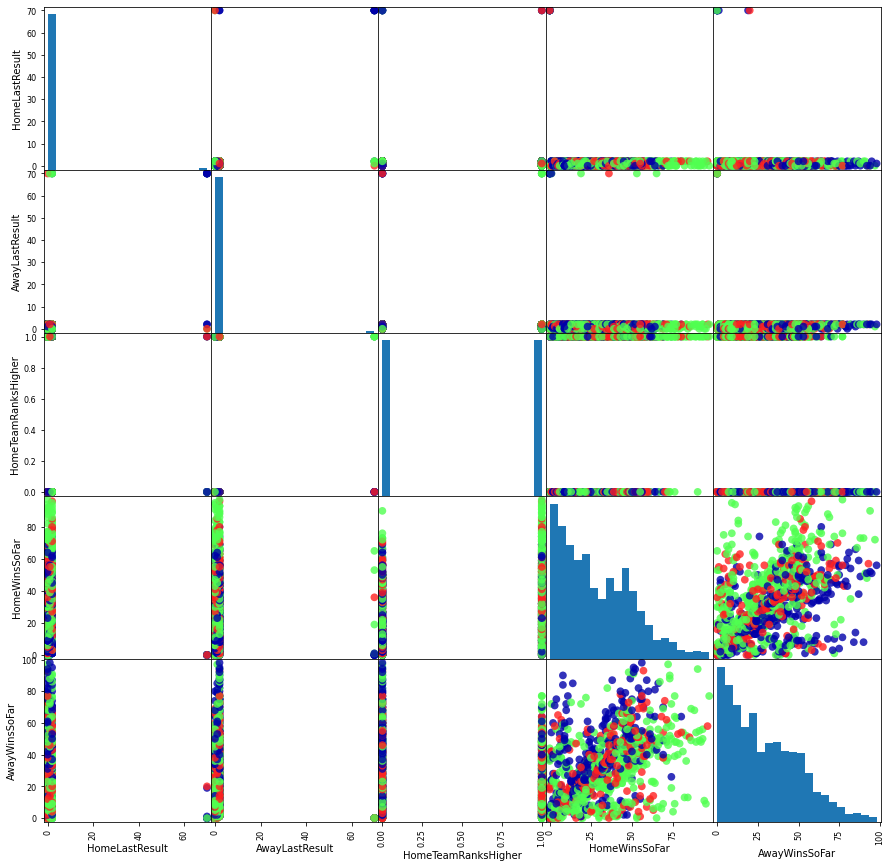

In [31]:

validation_dataframe = pd.DataFrame(training_set_X, columns=feature_names)
pd.plotting.scatter_matrix(validation_dataframe, c=training_set_y, figsize=(15, 15),
                          marker='o', hist_kwds={'bins' : 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)


In [32]:
pd.crosstab(validation_set_y, y_pred, rownames=['ACTUAL'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
ACTUAL,,,,
0,146,4,3,153
1,7,75,1,83
2,14,10,120,144
All,167,89,124,380


In [33]:
# Try our own data


test = [[0,0,0,0,0]] # Home/Away Last Result, WinsSoFar, HomeTeamRanksHigher
y_pred = knn.predict(test)
print("Prediction:" , y_pred)


Prediction: [0]


In [34]:
dataset["HomeWinStreak"] = 0
dataset["AwayWinStreak"] = 0

validation_set["HomeWinStreak"] = 0
validation_set["AwayWinStreak"] = 0

In [35]:
win_streak = defaultdict(int)

for index, row in dataset.iterrows():  # Note that this is not efficient
    home_team = row["HomeTeam"]
    away_team = row["AwayTeam"]
    row["HomeWinStreak"] = win_streak[home_team]
    row["AwayWinStreak"] = win_streak[away_team]
    dataset.iloc[index] = row    
    # Set current win
    if row['FTR'] == 2:
        win_streak[home_team] += 1
        win_streak[away_team] = 0
    elif row['FTR'] == 0:
        win_streak[home_team] = 0
        win_streak[away_team] += 1
    else:
        win_streak[home_team] += 0.5
        win_streak[away_team] += 0.5
    

In [36]:
win_streak = defaultdict(int)

for index, row in validation_set.iterrows():  # Note that this is not efficient
    home_team = row["HomeTeam"]
    away_team = row["AwayTeam"]
    row["HomeWinStreak"] = win_streak[home_team]
    row["AwayWinStreak"] = win_streak[away_team]
    validation_set.iloc[index] = row    
    # Set current win
    if row['FTR'] == 2:
        win_streak[home_team] += 1
        win_streak[away_team] = 0
    elif row['FTR'] == 0:
        win_streak[home_team] = 0
        win_streak[away_team] += 1
    else:
        win_streak[home_team] += 0.5
        win_streak[away_team] += 0.5
        


In [37]:
feature_names = ['HomeLastResult', 'AwayLastResult', 'HomeTeamRanksHigher', 'HomeWinsSoFar', 
                 'AwayWinsSoFar', 'HomeWinStreak', 'AwayWinStreak']

training_set_X = dataset[feature_names]
validation_set_X = validation_set[feature_names]




# C is the complete set of data using feature names as columns

In [38]:
training_set_X = training_set_X.astype('int')
training_set_y = training_set_y.astype('int')
validation_set_X = validation_set_X.astype('int')
validation_set_y = validation_set_y.astype('int')

training_set_X

,HomeLastResult,AwayLastResult,HomeTeamRanksHigher,HomeWinsSoFar,AwayWinsSoFar,HomeWinStreak,AwayWinStreak
0,70,70,0,0,0,0,0
1,70,70,0,0,0,0,0
2,70,70,1,0,0,0,0
3,70,70,0,0,0,0,0
4,70,70,0,0,0,0,0
...,...,...,...,...,...,...,...
1135,0,1,0,64,81,0,10
1136,2,0,1,95,9,4,0
1137,1,2,0,56,98,0,1
1138,2,0,0,55,23,4,0


In [39]:
training_set_y

0       0
1       2
2       2
3       0
4       0
       ..
1135    0
1136    2
1137    0
1138    2
1139    1
Name: FTR, Length: 1140, dtype: int32

In [40]:
validation_set_X

,HomeLastResult,AwayLastResult,HomeTeamRanksHigher,HomeWinsSoFar,AwayWinsSoFar,HomeWinStreak,AwayWinStreak
0,70,70,0,0,0,0,0
1,70,70,0,0,0,0,0
2,70,70,0,0,0,0,0
3,70,70,0,0,0,0,0
4,70,70,0,0,0,0,0
...,...,...,...,...,...,...,...
375,2,0,0,25,18,8,0
376,0,2,0,29,23,0,1
377,0,0,0,7,16,0,0
378,2,0,0,24,17,1,0


In [41]:
validation_set_y

0      0
1      2
2      2
3      0
4      0
      ..
375    2
376    2
377    2
378    2
379    0
Name: FTR, Length: 380, dtype: int32

In [42]:

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(training_set_X, training_set_y)
    y_pred = knn.predict(validation_set_X)
    # Using team names, how many wins each team has so far and which team ranked higher last season.
    print(k, ", Test set score:  {:.3f}%".format(np.mean(y_pred == validation_set_y) * 100))


1 , Test set score:  94.474%
2 , Test set score:  66.842%
3 , Test set score:  62.368%
4 , Test set score:  60.263%
5 , Test set score:  58.158%
6 , Test set score:  56.316%
7 , Test set score:  57.368%
8 , Test set score:  53.947%
9 , Test set score:  53.421%
10 , Test set score:  53.158%
11 , Test set score:  51.579%
12 , Test set score:  51.316%
13 , Test set score:  51.316%
14 , Test set score:  52.105%
15 , Test set score:  52.105%
16 , Test set score:  52.105%
17 , Test set score:  50.000%
18 , Test set score:  50.789%
19 , Test set score:  50.789%
20 , Test set score:  50.263%
21 , Test set score:  49.474%
22 , Test set score:  49.474%
23 , Test set score:  49.211%
24 , Test set score:  49.211%
25 , Test set score:  47.895%
26 , Test set score:  48.421%
27 , Test set score:  48.947%
28 , Test set score:  48.947%
29 , Test set score:  47.895%
30 , Test set score:  50.526%
31 , Test set score:  49.211%
32 , Test set score:  50.526%
33 , Test set score:  50.000%
34 , Test set score

In [43]:
# We can see that 1 neighbor provides the greatest accuracy.

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(training_set_X, training_set_y)
y_pred = knn.predict(validation_set_X)
# Using team names, how many wins each team has so far and which team ranked higher last season.
print("Test set score:  {:.3f}%".format(np.mean(y_pred == validation_set_y) * 100))


Test set score:  94.474%


In [44]:
pd.crosstab(validation_set_y, y_pred, rownames=['ACTUAL'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
ACTUAL,,,,
0,150,1,2,153
1,4,79,0,83
2,11,3,130,144
All,165,83,132,380


In [45]:
from sklearn.metrics import classification_report
print(classification_report(validation_set_y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       153
           1       0.95      0.95      0.95        83
           2       0.98      0.90      0.94       144

    accuracy                           0.94       380
   macro avg       0.95      0.94      0.95       380
weighted avg       0.95      0.94      0.94       380



### Evalution Function

In [46]:
# This function is used to compare model's using base parameters with those found using hypertuning methods.
from sklearn.metrics import mean_absolute_error
def evaluate(model, test_X, test_y):
    predictions = model.predict(test_X)
    actual, pred = np.array(test_y), np.array(predictions)
    mae = mean_absolute_error(actual, pred)   #np.mean(np.abs((actual - pred) / actual)) * 100
    accuracy = np.mean(pred == test_y) * 100
    print("Model Performance")
    print("Mean Absolute Error: {:0.4f}.".format(np.mean(mae)))
    print("Accuracy = {:0.2f}%.".format(accuracy))
    
    return accuracy

array([[<AxesSubplot:xlabel='HomeLastResult', ylabel='HomeLastResult'>,
        <AxesSubplot:xlabel='AwayLastResult', ylabel='HomeLastResult'>,
        <AxesSubplot:xlabel='HomeTeamRanksHigher', ylabel='HomeLastResult'>,
        <AxesSubplot:xlabel='HomeWinsSoFar', ylabel='HomeLastResult'>,
        <AxesSubplot:xlabel='AwayWinsSoFar', ylabel='HomeLastResult'>,
        <AxesSubplot:xlabel='HomeWinStreak', ylabel='HomeLastResult'>,
        <AxesSubplot:xlabel='AwayWinStreak', ylabel='HomeLastResult'>],
       [<AxesSubplot:xlabel='HomeLastResult', ylabel='AwayLastResult'>,
        <AxesSubplot:xlabel='AwayLastResult', ylabel='AwayLastResult'>,
        <AxesSubplot:xlabel='HomeTeamRanksHigher', ylabel='AwayLastResult'>,
        <AxesSubplot:xlabel='HomeWinsSoFar', ylabel='AwayLastResult'>,
        <AxesSubplot:xlabel='AwayWinsSoFar', ylabel='AwayLastResult'>,
        <AxesSubplot:xlabel='HomeWinStreak', ylabel='AwayLastResult'>,
        <AxesSubplot:xlabel='AwayWinStreak', ylabel='AwayLas

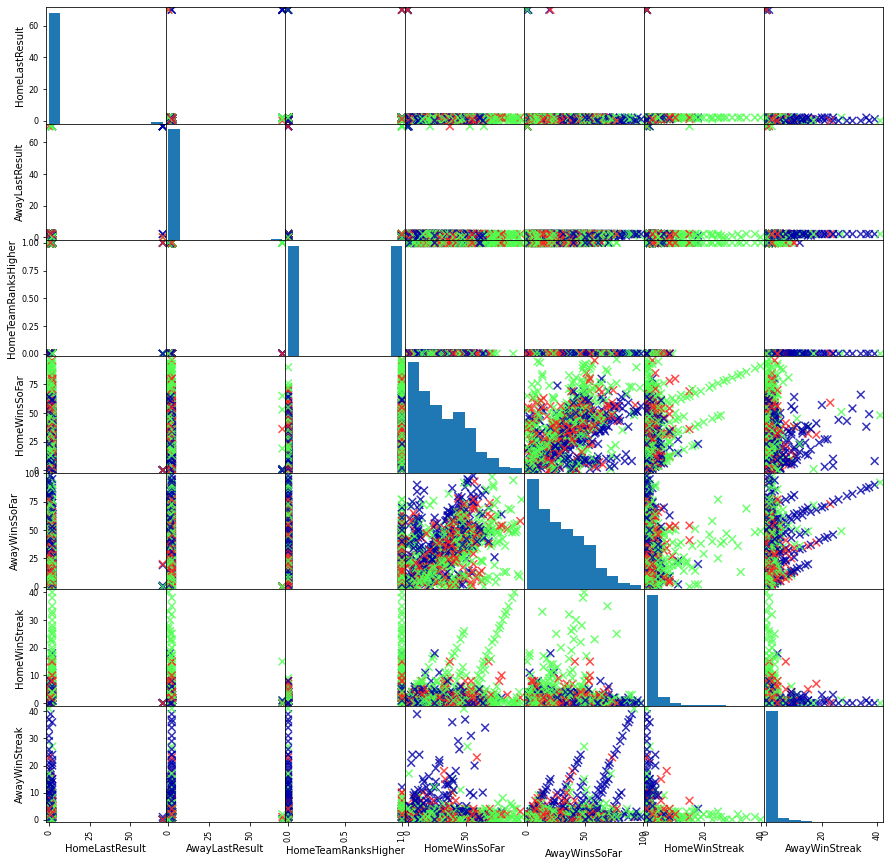

In [47]:
validation_dataframe = pd.DataFrame(training_set_X, columns=feature_names)
pd.plotting.scatter_matrix(validation_dataframe, c=training_set_y, figsize=(15, 15),
                          marker='x', hist_kwds={'bins' : 10}, s=60,
                           alpha=.8, cmap=mglearn.cm3)


In [48]:
print(training_set_X.shape)
print(training_set_y.shape)

print(validation_set_X.shape)
print(validation_set_y.shape)


training_set_y
training_set_X

(1140, 7)
(1140,)
(380, 7)
(380,)


,HomeLastResult,AwayLastResult,HomeTeamRanksHigher,HomeWinsSoFar,AwayWinsSoFar,HomeWinStreak,AwayWinStreak
0,70,70,0,0,0,0,0
1,70,70,0,0,0,0,0
2,70,70,1,0,0,0,0
3,70,70,0,0,0,0,0
4,70,70,0,0,0,0,0
...,...,...,...,...,...,...,...
1135,0,1,0,64,81,0,10
1136,2,0,1,95,9,4,0
1137,1,2,0,56,98,0,1
1138,2,0,0,55,23,4,0


In [49]:


training_total

,HomeLastResult,AwayLastResult,HomeTeamRanksHigher,HomeWinsSoFar,AwayWinsSoFar,HomeWinStreak,AwayWinStreak,FTR
0,70,70,0,0,0,0,0,0
1,70,70,0,0,0,0,0,2
2,70,70,1,0,0,0,0,2
3,70,70,0,0,0,0,0,0
4,70,70,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1135,0,1,0,64,81,0,10,0
1136,2,0,1,95,9,4,0,2
1137,1,2,0,56,98,0,1,0
1138,2,0,0,55,23,4,0,2


In [50]:
validation_total = validation_set_X.copy()
validation_total.insert(7, 'FTR', *column2)

validation_total

,HomeLastResult,AwayLastResult,HomeTeamRanksHigher,HomeWinsSoFar,AwayWinsSoFar,HomeWinStreak,AwayWinStreak,FTR
0,70,70,0,0,0,0,0,0
1,70,70,0,0,0,0,0,2
2,70,70,0,0,0,0,0,2
3,70,70,0,0,0,0,0,0
4,70,70,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
375,2,0,0,25,18,8,0,2
376,0,2,0,29,23,0,1,2
377,0,0,0,7,16,0,0,2
378,2,0,0,24,17,1,0,2


In [51]:
complete_set = training_total.append(validation_total, ignore_index=True, verify_integrity=False, sort=False)

In [207]:
complete_set

,HomeLastResult,AwayLastResult,HomeTeamRanksHigher,HomeWinsSoFar,AwayWinsSoFar,HomeWinStreak,AwayWinStreak,FTR
0,70,70,0,0,0,0,0,0
1,70,70,0,0,0,0,0,2
2,70,70,1,0,0,0,0,2
3,70,70,0,0,0,0,0,0
4,70,70,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1515,2,0,0,25,18,8,0,2
1516,0,2,0,29,23,0,1,2
1517,0,0,0,7,16,0,0,2
1518,2,0,0,24,17,1,0,2


In [208]:
X = complete_set.drop(columns=['FTR'])
X.head()

,HomeLastResult,AwayLastResult,HomeTeamRanksHigher,HomeWinsSoFar,AwayWinsSoFar,HomeWinStreak,AwayWinStreak
0,70,70,0,0,0,0,0
1,70,70,0,0,0,0,0
2,70,70,1,0,0,0,0
3,70,70,0,0,0,0,0
4,70,70,0,0,0,0,0


In [209]:
y = complete_set['FTR'].values
y[0:5]

array([0, 2, 2, 0, 0])

In [210]:

from sklearn.model_selection import cross_val_score
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(knn, X, y, cv=10)
    # print each cv score (accuracy) and average them
    #print(cv_scores)
    print(i, ", cv_scores mean:{}".format(np.mean(cv_scores)))


# 68.5% accuracy, more of a realistic representation on unseen data.

1 , cv_scores mean:0.6842105263157894
2 , cv_scores mean:0.5289473684210526
3 , cv_scores mean:0.5144736842105264
4 , cv_scores mean:0.4927631578947369
5 , cv_scores mean:0.49407894736842095
6 , cv_scores mean:0.5026315789473684
7 , cv_scores mean:0.4967105263157895
8 , cv_scores mean:0.48618421052631583
9 , cv_scores mean:0.4921052631578947
10 , cv_scores mean:0.4809210526315789
11 , cv_scores mean:0.47171052631578947
12 , cv_scores mean:0.4809210526315789
13 , cv_scores mean:0.4894736842105264
14 , cv_scores mean:0.48881578947368426
15 , cv_scores mean:0.4855263157894737
16 , cv_scores mean:0.49671052631578955
17 , cv_scores mean:0.4875
18 , cv_scores mean:0.4894736842105263
19 , cv_scores mean:0.4894736842105263
20 , cv_scores mean:0.4947368421052632
21 , cv_scores mean:0.4947368421052632
22 , cv_scores mean:0.4927631578947369
23 , cv_scores mean:0.4881578947368421
24 , cv_scores mean:0.4861842105263158
25 , cv_scores mean:0.4894736842105263
26 , cv_scores mean:0.4861842105263158
27

## Tuning Hyperparameters

In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
knn_gscv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [213]:
knn_gscv.best_params_    # Best number of neighbors to use is 1

{'n_neighbors': 1}

In [214]:
knn_gscv.best_score_     # Accuracy of model when using optimal neighbors

0.6842105263157894

In [215]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1,
       0, 1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1,
       0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0,

In [216]:
validation_set_y.to_numpy()

array([0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1,
       0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0,

<Figure size 432x288 with 0 Axes>

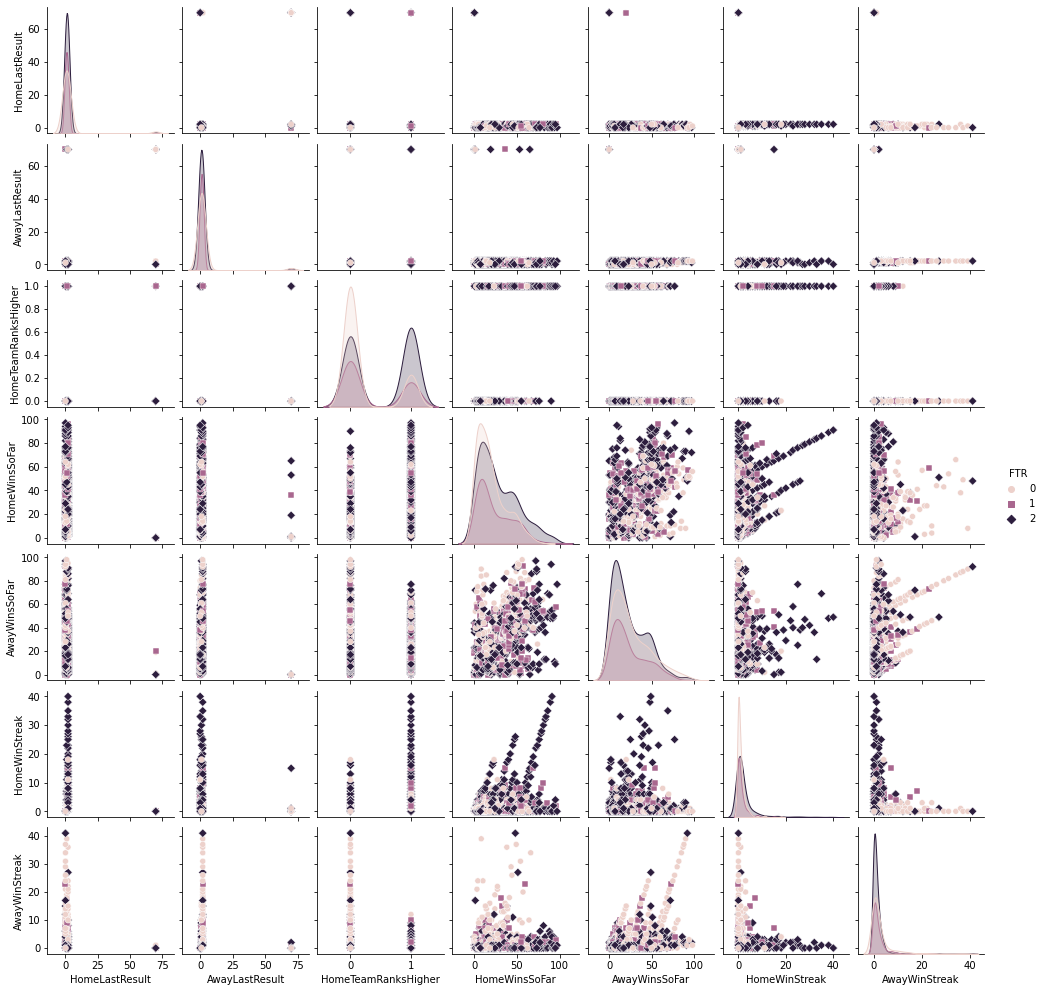

In [217]:
plt.figure()
sns.pairplot(complete_set, hue = "FTR", height=2, markers=["o", "s", "D"])
plt.show()

## Decision Trees

In [218]:
from sklearn.tree import DecisionTreeClassifier

In [219]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(training_set_X, training_set_y)

DecisionTreeClassifier()

In [220]:
y_pred = dt_clf.predict(validation_set_X)
print("Test set score:  {:.3f}%".format(np.mean(y_pred == validation_set_y) * 100))
print(dt_clf.get_params())

Test set score:  67.105%
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [221]:
dt_clf = DecisionTreeClassifier()
cv_scores = cross_val_score(dt_clf, X, y, cv=10)
# print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))


# around 55% accuracy when using cross validation.

[0.64473684 0.65789474 0.59868421 0.46710526 0.45394737 0.40789474
 0.41447368 0.58552632 0.65131579 0.68421053]
cv_scores mean:0.5565789473684211


## Preprocessing

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth":[None,1, 30],
    "min_samples_split":range(2, 30),
    "min_samples_leaf":range(1, 10)
}

In [224]:
grid = GridSearchCV(dt_clf, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(training_set_X, training_set_y)

Fitting 10 folds for each of 1512 candidates, totalling 15120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 10832 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 15120 out of 15120 | elapsed:   18.5s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 30],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 30)},
             verbose=1)

In [225]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [226]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [227]:
grid.best_score_

0.543859649122807

In [229]:
y_predGS = grid.predict(validation_set_X)
accuracy_GS_DT = evaluate(grid, validation_set_X, validation_set_y)

Model Performance
Mean Absolute Error: 0.9763.
Accuracy = 40.26%.


## Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [231]:
# n_estimators, default=100
# max_depth, default=None

rfc = RandomForestClassifier(random_state = 45, max_depth=None, n_estimators=100)
rfc.fit(training_set_X, training_set_y)
y_pred = rfc.predict(validation_set_X)
print("Test set score:  {:.3f}%".format(np.mean(y_pred == validation_set_y) * 100))
print(rfc.get_params())

Test set score:  69.474%
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 45, 'verbose': 0, 'warm_start': False}


### Cross Validation

In [232]:
rfc = RandomForestClassifier()
cv_scores = cross_val_score(rfc, X, y, cv=10)
# print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))


# around 60% accuracy when using cross validation.

[0.78289474 0.69736842 0.57236842 0.51315789 0.51315789 0.52631579
 0.46052632 0.58552632 0.66447368 0.73026316]
cv_scores mean:0.6046052631578948


### Hyperparameter Tuning

#### RandomSearchCV

In [233]:
from sklearn.model_selection import RandomizedSearchCV

In [234]:
# The number of trees in the forest.
n_estimators = []
for n in range(200, 2200, 200):
    n_estimators.append(n)
# The number of features to consider when looking for the best split.    
max_features = ['auto', 'sqrt']

# The maximum depth of the tree.
max_depth = []
for d in range(10, 110, 10):
    max_depth.append(d)
max_depth.append(None)

# The minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10]
# The minimum number of samples required to be at a leaf node.
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree.
bootstrap = [True, False]

# Creating our random grid
random_grid = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }
               
    
    
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [235]:
# Using random grid to search for the best hyperparameters.
# Random selection of parameters, with 100 iterations of searching, using 10 fold cross validation.

rfc = RandomForestClassifier()

# n_jobs = -1, means using all processors.
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter = 100, cv = 10, verbose = 2, random_state = 45, n_jobs = -1)

# Then fit
rfc_random.fit(training_set_X, training_set_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.9min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=45, verbose=2)

In [236]:
rfc_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

#### Compare performance with base parameters

In [237]:
base_model = RandomForestClassifier(random_state=45)
base_model.fit(training_set_X, training_set_y)
base_accuracy = evaluate(base_model, validation_set_X, validation_set_y)

Model Performance
Mean Absolute Error: 0.4737.
Accuracy = 69.47%.


In [238]:
best_random = rfc_random.best_estimator_
random_accuracy = evaluate(best_random, validation_set_X, validation_set_y)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Mean Absolute Error: 0.7447.
Accuracy = 52.37%.
Improvement of -24.62%.


In [239]:
# Now we can create a parameter grid based on the results of the random search above.


param_grid = { 
    'n_estimators': [1780, 1790, 1810, 1820],
    'max_depth' : [10, 15, 20],
    'min_samples_leaf':[1, 2, 3],
    'min_samples_split': [4, 5, 6],
    'bootstrap': [True]
}

# Create base model
rfc = RandomForestClassifier(random_state = 45)
GS_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, n_jobs=-1)


In [240]:
# Fit grid search to the data.
print("START")
GS_rfc.fit(training_set_X, training_set_y)
print("DONE")
GS_rfc.best_params_


best_grid = GS_rfc.best_estimator_
grid_accuracy = evaluate(best_grid, validation_set_X, validation_set_y)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

START
DONE
Model Performance
Mean Absolute Error: 0.7368.
Accuracy = 53.42%.
Improvement of -23.11%.


In [241]:
y_predGS = GS_rfc.predict(validation_set_X)
print("Test set score:  {:.3f}%".format(np.mean(y_predGS == validation_set_y) * 100))

Test set score:  53.421%


In [242]:
GS_rfc.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 1780}

In [243]:
y_predGSb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,

In [245]:
validation_set_y

0      0
1      2
2      2
3      0
4      0
      ..
375    2
376    2
377    2
378    2
379    0
Name: FTR, Length: 380, dtype: int32

0      0
1      2
2      2
3      0
4      0
      ..
375    2
376    2
377    2
378    2
379    0
Name: FTR, Length: 380, dtype: int32

### Neural Network

In [256]:
from sklearn.neural_network import MLPClassifier

In [297]:
mlpc = MLPClassifier(max_iter=100)
mlpc.fit(training_set_X, training_set_y)
predict_mlpc = mlpc.predict(validation_set_X)

In [298]:
print(classification_report(validation_set_y, predict_mlpc))
pd.crosstab(validation_set_y, predict_mlpc, rownames=['ACTUAL'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.45      0.84      0.59       153
           1       0.38      0.04      0.07        83
           2       0.64      0.38      0.47       144

    accuracy                           0.49       380
   macro avg       0.49      0.42      0.37       380
weighted avg       0.51      0.49      0.43       380



Predicted,0,1,2,All
ACTUAL,,,,
0,129,2,22,153
1,72,3,8,83
2,87,3,54,144
All,288,8,84,380


In [299]:
print("Test set score:  {:.3f}%".format(np.mean(predict_mlpc == validation_set_y) * 100))


Test set score:  48.947%


In [300]:
predict_mlpc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,

In [301]:
mlpc = MLPClassifier(max_iter=100)
cv_scores = cross_val_score(mlpc, X, y, cv=10)
# print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))


C:\Users\WillyB\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\WillyB\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\WillyB\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\WillyB\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\WillyB\Anaconda3\lib\site-packages\sklearn\neural_network\_

[0.55921053 0.53289474 0.54605263 0.52631579 0.55921053 0.55921053
 0.48684211 0.50657895 0.44736842 0.46710526]
cv_scores mean:0.5190789473684211


In [296]:
mlpc.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

#### RandomizedSearchCV

In [306]:
mlpc = MLPClassifier(max_iter=100)

random_grid = {
        'hidden_layer_sizes': [(11,11,11), (50,50,50), (50,100,50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive'],
    }

mlpc_random = RandomizedSearchCV(estimator=mlpc, param_distributions=random_grid, n_iter = 100, cv = 10, verbose = 2, random_state = 45, n_jobs = -1)
mlpc_random.fit(training_set_X, training_set_y)

C:\Users\WillyB\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.3min finished
C:\Users\WillyB\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=MLPClassifier(max_iter=100), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(11, 11, 11),
                                                               (50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=45, verbose=2)

In [307]:
mlpc_random.best_params_

{'solver': 'adam',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (11, 11, 11),
 'alpha': 0.05,
 'activation': 'relu'}

In [309]:
mlpc_random.best_estimator_

MLPClassifier(alpha=0.05, hidden_layer_sizes=(11, 11, 11),
              learning_rate='adaptive', max_iter=100)

In [343]:
best_grid = mlpc_random.best_estimator_

param_grid = {
    'hidden_layer_sizes': [(10), (20), (30), (40), (50), (25)]
}

GS_mlpc = GridSearchCV(estimator=best_grid, param_grid=param_grid, cv=10, n_jobs=-1)
GS_mlpc.fit(training_set_X, training_set_y)

print("Best parems: ", GS_mlpc.best_params_)
print("Best score: ", GS_mlpc.best_score_)


Best parems:  {'hidden_layer_sizes': 40}
Best score:  0.5324561403508772


C:\Users\WillyB\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


AttributeError: 'MLPClassifier' object has no attribute 'n_layers'

In [52]:
corr = complete_set.corr()

In [53]:
corr

,HomeLastResult,AwayLastResult,HomeTeamRanksHigher,HomeWinsSoFar,AwayWinsSoFar,HomeWinStreak,AwayWinStreak,FTR
HomeLastResult,1.000000,0.687633,-0.032020,-0.132860,-0.137076,-0.009585,-0.056218,-0.053115
AwayLastResult,0.687633,1.000000,-0.043915,-0.094213,-0.124733,-0.025829,-0.013503,-0.044901
HomeTeamRanksHigher,-0.032020,-0.043915,1.000000,0.363809,-0.014648,0.221346,-0.169515,0.290628
HomeWinsSoFar,-0.132860,-0.094213,0.363809,1.000000,0.631101,0.270534,0.062656,0.192353
AwayWinsSoFar,-0.137076,-0.124733,-0.014648,0.631101,1.000000,0.044425,0.312848,-0.047498
HomeWinStreak,-0.009585,-0.025829,0.221346,0.270534,0.044425,1.000000,-0.024019,0.175638
AwayWinStreak,-0.056218,-0.013503,-0.169515,0.062656,0.312848,-0.024019,1.000000,-0.155246
FTR,-0.053115,-0.044901,0.290628,0.192353,-0.047498,0.175638,-0.155246,1.000000
